## Hierarchical clustering

Hierarchical clustering is a method of cluster analysis that seeks to build a hierarchy of clusters. It is a bottom-up approach, where each data point is initially considered its own cluster. The algorithm then repeatedly merges the two most similar clusters until there is only one cluster left.

### Types:
1. **Agglomerative clustering** starts with each data point as its own cluster and merges the most similar clusters until there is only one cluster left. 
2. **Divisive clustering** starts with all the data points in a single cluster and successively divides the cluster into smaller and smaller clusters until each data point is in its own cluster.

![agglomerative vs divisive clustering](agg&divisive.png)

### Pros & Cons:
**1. Pros:**
    - Hierarchy Exploration (Dendrogram)
    - No Need for Prespecified Number of Clusters
    - Cluster Interpretability
    - Supports Agglomerative and Divisive Approaches
    - Handles Variable Scale Data
**2. Cons:**
    - Computationally Intensive
    - Memory Usage
    - Lack of Scalability for High-Dimensional Data
    - Fixed Hierarchy (Non-Adaptive)
    - Sensitivity to Linkage Methods

### Algorithm:
1. Initialize: Start with each data point as its own cluster.
2. Merge: Repeatedly merge the two most similar clusters until there is only one cluster left.
3. Choose a linkage criterion: The linkage criterion determines how the similarity between two clusters is measured. There are many different linkage criteria, but some of the most common ones are single linkage, complete linkage, and average linkage.
4. Compute the distance between clusters: The distance between two clusters is calculated using the linkage criterion.
5. Merge the two clusters with the smallest distance: The two clusters with the smallest distance are merged to form a new cluster.
6. Repeat steps 3-5: Repeat steps 3-5 until there is only one cluster left.


### Implementation:

In [1]:
#import libraries
import pandas as pd
import numpy as np

from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read dataset
df = pd.read_csv('./dataset/customers_data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
#normalize the data and bring all the variables to the same scale
data_scaled = normalize(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


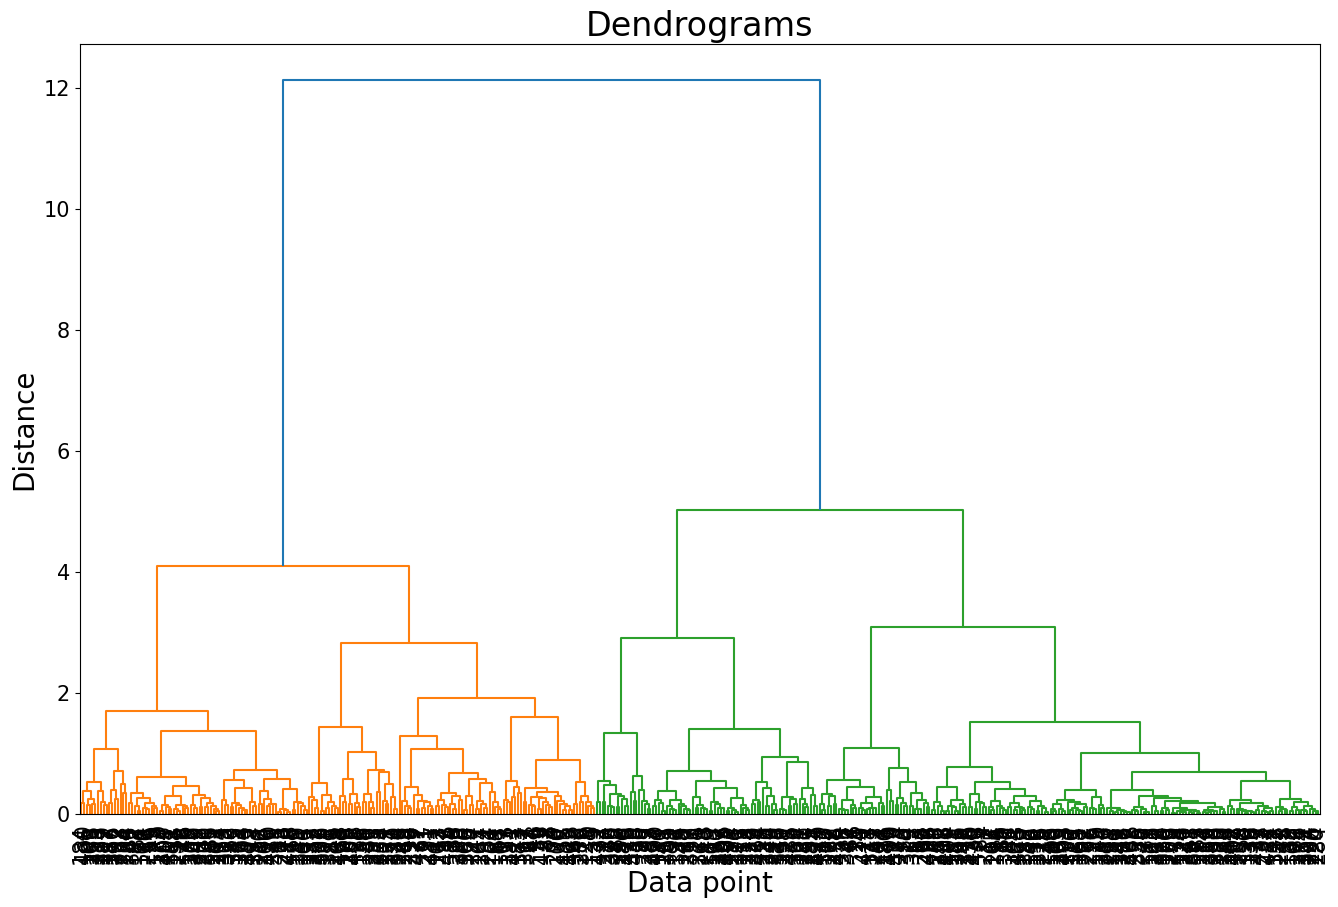

In [4]:
# Draw the dendrogram
plt.figure(figsize=(16, 10))
plt.title("Dendrograms", size=24)
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

# Customize the dendrogram
plt.xlabel("Data point", size=20)
plt.ylabel("Distance", size=20)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.show()

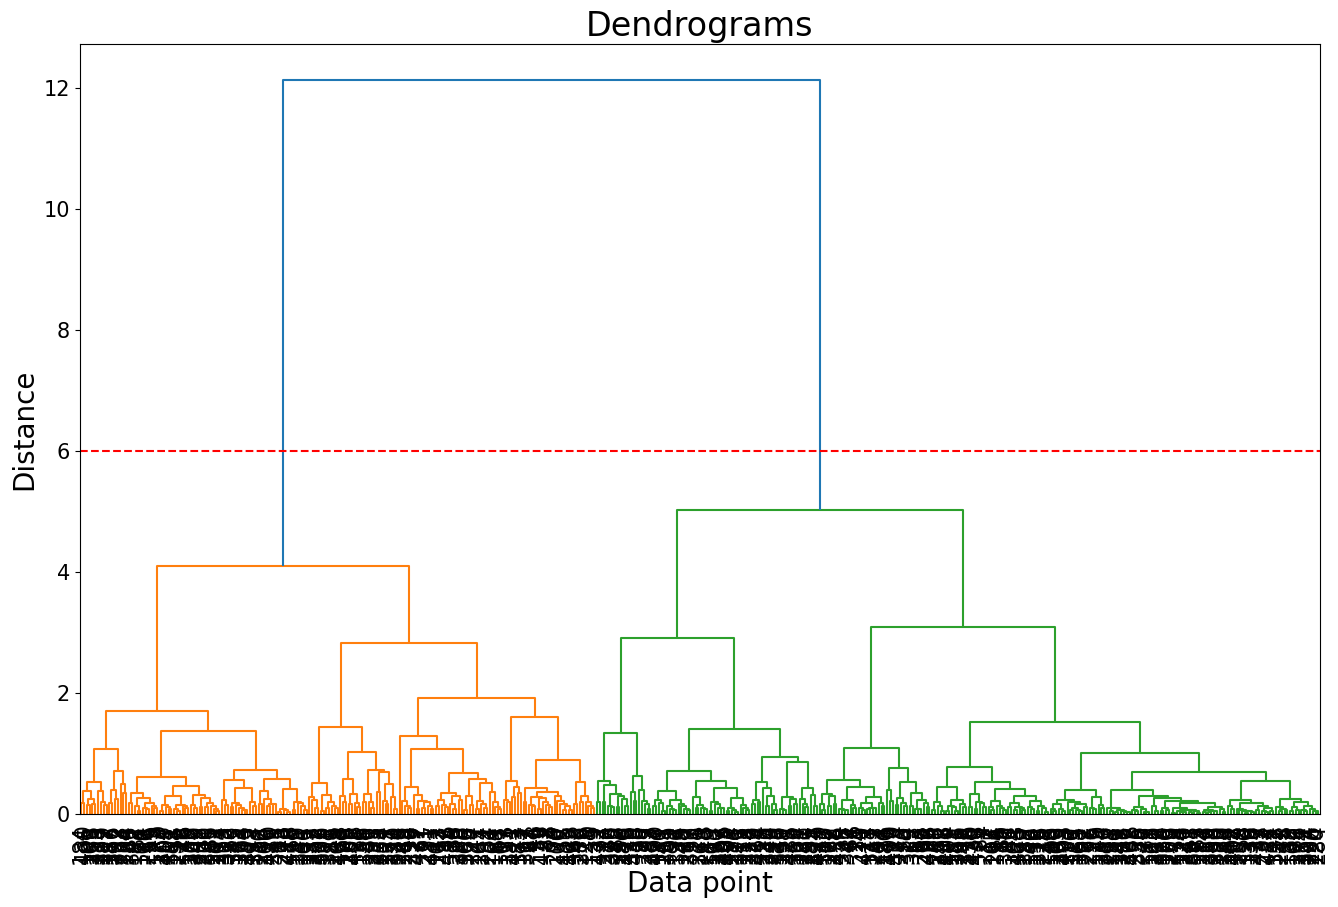

In [5]:
#cut the longest line(in this case blue line)
plt.figure(figsize=(16, 10))
plt.title("Dendrograms", size=24)
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

# Customize the dendrogram
plt.xlabel("Data point", size=20)
plt.ylabel("Distance", size=20)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.show()

In [6]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

C:\Users\asmit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

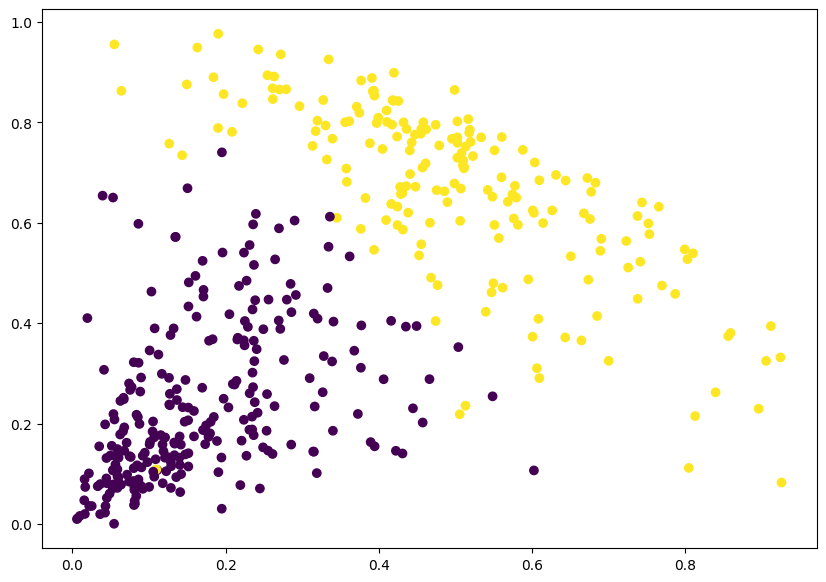

In [7]:
#plot the data
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_) 
plt.show()